# MACHINE LEARNING: BÀI THỰC HÀNH SỐ 2 – PHẦN 2

## 1. PHƯƠNG PHÁP HỒI QUY LOGISTIC

### Ví dụ 1

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
               2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data by adding a column of 1s (x_0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

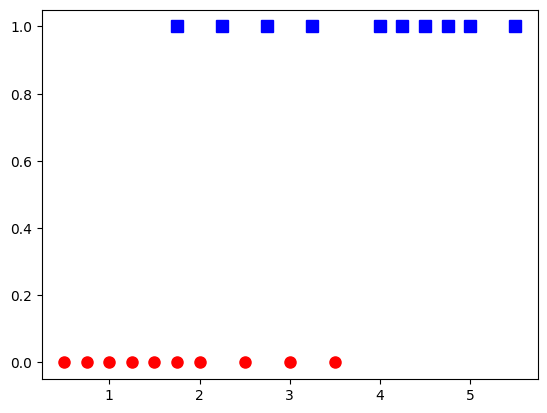

In [2]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()

In [3]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    # method to calculate model logistic regression by Stochastic Gradient Descent method
    # eta: learning rate; tol: tolerance; max_count: maximum iterates
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    
    # loop of stochastic gradient descent
    while count < max_count:
        # shuffle the order of data (for stochastic gradient descent).
        # and put into mix_id
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [4]:
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


In [5]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


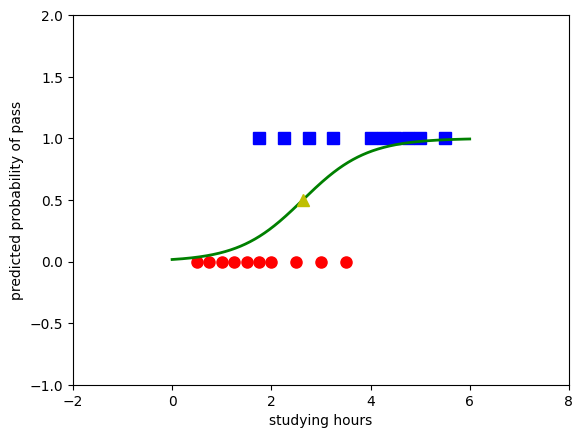

In [6]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0]
w1 = w[-1][1]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

In [7]:
x_test = np.array([2.45, 1.85, 3.75, 3.21, 4.05])
y_pred = np.array([1 if x > threshold else 0 for x in x_test])
print(y_pred)

[0 0 1 1 1]


### Ví dụ 2

In [8]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# generate list of data points
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

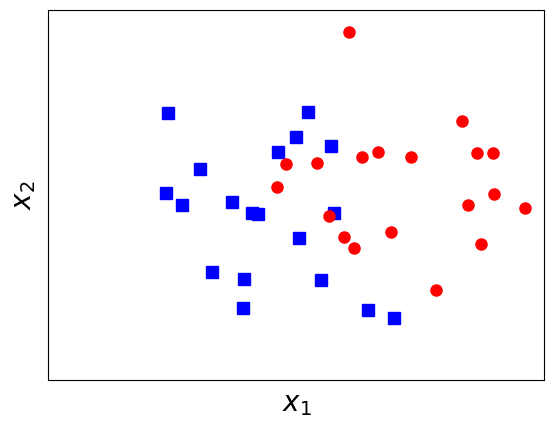

In [9]:
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.show()

In [10]:
def sigmoid(s):
    return 1/(1 + np.exp(-s)) # calculate sigmoid function

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    lambda_ = 0.0001
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data for stochastic gradient descent method
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi - lambda_*w[-1]
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [11]:
X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T

# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1) # initialize parameters w = w_init

# call logistic_sigmoid_regression procedure
w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)

# print out the parameter
print(w[-1])

[[-6.88427268]
 [ 1.64611264]
 [ 0.97162051]]


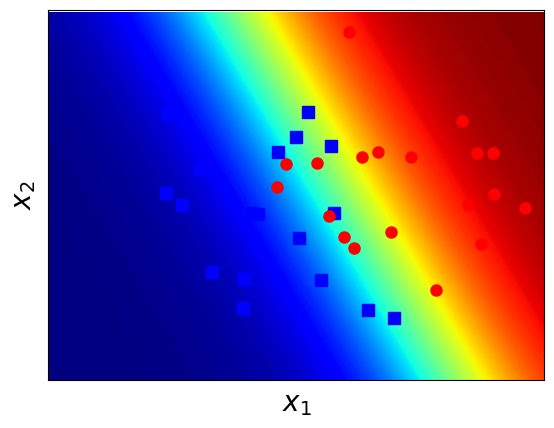

In [12]:
# Make data.
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)

# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]

# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)

# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')

# finally, plot the data and take a look
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T

logreg = LogisticRegression()
logreg.fit(X.T, y.ravel())
print('X = ', X)
print('Intercept: ', logreg.intercept_)
print('Coefficients: ', logreg.coef_)
print('Accuracy: ', logreg.score(X.T, y.ravel()))
print('Confusion matrix: ', metrics.confusion_matrix(y.ravel(), logreg.predict(X.T)))

X =  [[ 1.92306918  2.90509186  1.58909188  2.76874122  2.52416203  2.02414192
   2.49174878  1.11439322  2.62561276  3.27183166  3.55617919  1.45945603
   2.87575608  2.30375703  1.08925412  4.09096119  1.80350003  1.25827634
   2.08532169  1.9340609   4.49775285  3.07311718  3.52528933  2.39091046
   3.12302646  4.62359547  3.38696098  4.36167918  3.21261415  2.71754956
   4.01073111  3.11892586  2.29402636  3.7365999   4.29699439  4.63617269
   2.84870815  4.45368062  4.97052399  3.01324102]
 [ 0.775673    1.7997662   1.16143907  1.07663514  1.53020387  1.80692632
   2.62943405  2.88348991  2.89077234  0.75454543  0.66250438  2.28222634
   2.52637908  2.46497356  2.01982447 -0.08330889  1.91837255  1.8856175
   1.79005729  1.09208652  1.46545116  3.76212796  1.59844519  2.33431976
   1.41945943  2.44921113  2.46494505  1.88637824  2.40558547  2.33882965
   0.96947283  4.10522222  2.07905375  2.41022672  2.79542218  2.00962462
   1.77280105  2.44805003  1.86194687  1.54377016]]
Inter

### Ví dụ 3

In [14]:
# importing module
import numpy as np
import pandas as pd

data = pd.read_csv("Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [15]:
# Split data into X and y
X = data.iloc[:, 1:8]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [16]:
y = data.iloc[:, 8]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit, Length: 400, dtype: float64

In [17]:
# Split data into training and test sets
X_train = X[:350]
X_test = X[350:]
y_train = y[:350]
y_test = y[350:]

#### a) Phân loại bằng phương pháp hồi quy Logistic

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import time

# Create and train a logistic regression model
logreg = LogisticRegression(max_iter = 10000)
y_train_classified = np.where(y_train >= 0.75, 1, 0)
start_time = time.time()
logreg.fit(X_train, y_train_classified)
end_time = time.time()
print("Training time: ", end_time - start_time)

# Print the intercept and coefficients
print("Intercept: ", logreg.intercept_)
print("Coefficients:\n", logreg.coef_)

# Predict the response for test dataset
y_pred = logreg.predict(X_test)

# Calculate the accuracy, precision and recall
y_test_classified = np.where(y_test >= 0.75, 1, 0)
print("Accuracy:  ", metrics.accuracy_score(y_test_classified, y_pred))
print("Precision: ", metrics.precision_score(y_test_classified, y_pred))
print("Recall:    ", metrics.recall_score(y_test_classified, y_pred))

Training time:  0.0640716552734375
Intercept:  [-55.26140658]
Coefficients:
 [[0.05578915 0.12277104 0.45215336 0.41536863 0.60010853 2.16206072
  0.7341448 ]]
Accuracy:   0.9
Precision:  0.9473684210526315
Recall:     0.8181818181818182


#### b) Dự đoán khả năng bằng hồi quy tuyến tính

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create and train the model
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train, y_train)

# Print the intercept and coefficients
print('Intercept: ', linreg.intercept_)
print('Coefficients: ', linreg.coef_)

# Make predictions using the testing set
y_pred = linreg.predict(X_test)

# Mean Squared Error
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

Intercept:  -1.1950364915049323
Coefficients:  [ 0.00154891  0.00324646  0.00931544 -0.00438297  0.02493287  0.11235144
  0.02194172]
MSE:  0.00464167844036714


#### c) Sử dụng phương pháp Naïve Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import time

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
y_train_classified = np.where(y_train >= 0.75, 1, 0)
start_time = time.time()
model.fit(X_train, y_train_classified)
end_time = time.time()
print(f'Training time: {end_time - start_time} seconds')

# Predict response for test dataset
y_pred = model.predict(X_test)

# Model Evaluation
y_test_classified = np.where(y_test >= 0.75, 1, 0)
print("Accuracy:", metrics.accuracy_score(y_test_classified, y_pred))
print("Precision:", metrics.precision_score(y_test_classified, y_pred))
print("Recall:", metrics.recall_score(y_test_classified, y_pred))

Training time: 0.003997325897216797 seconds
Accuracy: 0.9
Precision: 0.9473684210526315
Recall: 0.8181818181818182


### Ví dụ 4